In [1]:
#Imports
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Getting the dataset
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git ../data/raw/clothing-dataset-small/

fatal: destination path '../data/raw/clothing-dataset-small' already exists and is not an empty directory.


In [3]:
train_path = '../data/raw/clothing-dataset-small/train/'
val_path = '../data/raw/clothing-dataset-small/validation/'
test_path = '../data/raw/clothing-dataset-small/test/'

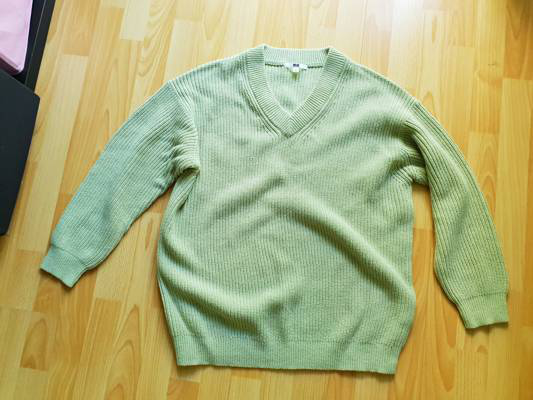

In [4]:
import glob
from PIL import Image
import random
clothing_list = glob.glob('../data/raw/clothing-dataset-small/train/**/*.*', recursive=True)
Image.open(random.choice(clothing_list))


In [5]:
!pip install deepfeatx --quiet

In [6]:
from deepfeatx.image import ImageFeatureExtractor

In [7]:
fe = ImageFeatureExtractor()

In [8]:
df = fe.extract_features_from_directory(train_path,
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 3068 images belonging to 10 classes.
96/96 [==============================] - 15s 118ms/step


In [9]:
val = fe.extract_features_from_directory(val_path,
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 341 images belonging to 10 classes.
11/11 [==============================] - 2s 177ms/step


In [10]:
test = fe.extract_features_from_directory(test_path,
                                   classes_as_folders=True,
                                   export_class_names=True)

Found 372 images belonging to 10 classes.
12/12 [==============================] - 2s 171ms/step


In [11]:
df.head()

,filepaths,classes,0,1,2,3,4,5,6,7,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,../data/raw/clothing-dataset-small/train/dress...,dress,0.042460,1.875373,0.000000,2.060594,0.433915,0.005656,0.026123,0.333477,...,0.307839,1.056877,0.000000,0.003265,0.000000,0.000000,0.027121,0.436055,0.000000,0.390338
1,../data/raw/clothing-dataset-small/train/dress...,dress,0.025774,0.953888,0.336730,0.000000,0.025267,0.212971,0.074700,0.000000,...,0.059057,0.204012,0.000000,0.103856,0.182376,0.446977,0.000228,1.121514,0.143794,1.256672
2,../data/raw/clothing-dataset-small/train/dress...,dress,0.051302,4.518892,0.000000,0.330943,0.476871,0.046683,0.606202,0.479695,...,1.242172,0.000000,0.582222,0.000000,0.000000,0.119602,0.013267,0.004082,0.166753,0.233876
3,../data/raw/clothing-dataset-small/train/dress...,dress,0.022691,0.481851,0.146194,0.000000,0.020019,0.288917,0.528621,0.008216,...,1.658859,0.004760,0.000000,0.003752,0.002769,0.065090,0.065709,0.077569,0.362168,0.592691
4,../data/raw/clothing-dataset-small/train/dress...,dress,0.231369,2.579861,0.157428,0.628241,2.256970,0.084941,0.744962,0.094804,...,0.172142,0.131973,0.050736,0.010276,0.122933,0.329143,1.164254,1.709702,0.189396,3.573076


In [12]:
df.shape

(3068, 2050)

In [13]:
X_train = df.drop(['filepaths', 'classes'], axis=1)
y_train = df['classes']

In [14]:
X_val = val.drop(['filepaths', 'classes'], axis=1)
y_val = val['classes']

In [15]:
X_test = test.drop(['filepaths', 'classes'], axis=1)
y_test = test['classes']

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression(max_iter=10000, random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [18]:
lr.score(X_test, y_test)

0.8924731182795699

In [19]:
from sklearn.metrics import classification_report

In [20]:
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       dress       0.93      0.87      0.90        15
         hat       1.00      0.92      0.96        12
  longsleeve       0.85      0.85      0.85        72
     outwear       0.89      0.84      0.86        38
       pants       0.93      0.98      0.95        42
       shirt       0.71      0.65      0.68        26
       shoes       1.00      0.99      0.99        73
      shorts       0.87      0.90      0.89        30
       skirt       0.85      0.92      0.88        12
     t-shirt       0.85      0.90      0.88        52

    accuracy                           0.89       372
   macro avg       0.89      0.88      0.88       372
weighted avg       0.89      0.89      0.89       372



In [21]:
directory = '../models'
if not os.path.exists(directory):
    os.makedirs(directory)
import pickle
pickle.dump(lr, open('../models/logistic_regression.pkl', 'wb'))

In [22]:
import pickle
model = pickle.load(open('../models/logistic_regression.pkl', 'rb'))

In [28]:
model.classes_

array(['dress', 'hat', 'longsleeve', 'outwear', 'pants', 'shirt', 'shoes',
       'shorts', 'skirt', 't-shirt'], dtype=object)

In [23]:
import gradio as gr
from PIL import Image
def recognize_clothing(img):
    #img=Image.fromarray(img)
    vector = fe.img_to_vector(img)
    label = lr.predict(vector)
    confidence = lr.predict_proba(vector)
    return label[0], confidence[0]

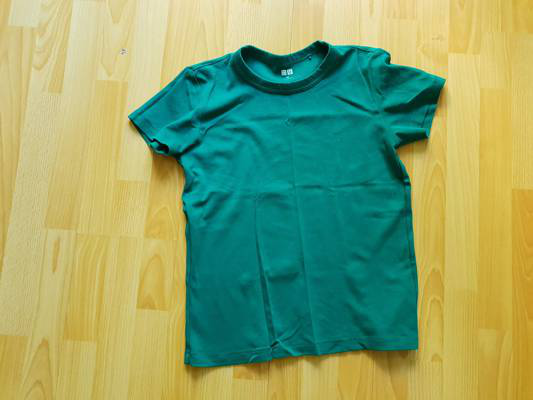

In [24]:
clothing_list = glob.glob('./clothing-dataset-small/train/**/*.*', recursive=True)
img=Image.open(random.choice(clothing_list))
img

In [25]:
vector = fe.img_to_vector(img)

In [26]:
recognize_clothing(img)

('t-shirt',
 array([1.46095774e-04, 4.42508624e-10, 1.99922919e-05, 5.47295955e-08,
        7.45697755e-10, 4.14415697e-07, 2.28276318e-09, 4.72384041e-13,
        2.38597443e-12, 9.99833439e-01]))

In [27]:
gr.Interface(fn=recognize_clothing, inputs="image", outputs="text").launch(debug=True)

Running locally at: http://127.0.0.1:7860/
To create a public link, set `share=True` in `launch()`.
Interface loading below...


KeyboardInterrupt: 